In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

In [2]:
df = pd.read_csv('dm-end2-2.csv')
print(df.shape)
print(df.info())
display(df.head())

(301, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      301 non-null    float64
 1   sex      301 non-null    float64
 2   bmi      301 non-null    float64
 3   bp       301 non-null    float64
 4   s1       301 non-null    float64
 5   s2       301 non-null    float64
 6   s3       301 non-null    float64
 7   s4       301 non-null    float64
 8   s5       301 non-null    float64
 9   s6       301 non-null    float64
 10  disease  301 non-null    float64
dtypes: float64(11)
memory usage: 26.0 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783,259.0
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494,128.0
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633,116.0
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064,196.0
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343,220.0


In [4]:
dfX = df.loc[:, :'s6']
print(dfX.shape)
display(dfX.head())

(301, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343


In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

In [6]:
n_pca = 10
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [10]:
print(pca.explained_variance_ratio_)


[0.40661797 0.15601016 0.1179804  0.08906281 0.06443856 0.0617785
 0.05172373 0.04373388 0.00780559 0.0008484 ]


In [9]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.40661797 0.56262814 0.68060853 0.76967135 0.8341099  0.8958884
 0.94761213 0.99134601 0.9991516  1.        ]


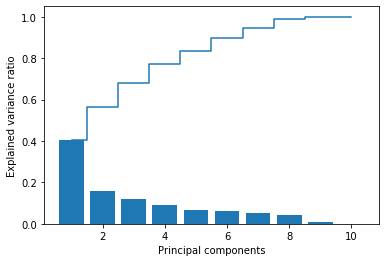

In [8]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [12]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 15
    r2 = 1.03
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    #plt.axes().set_box_aspect(1)

    
    return None

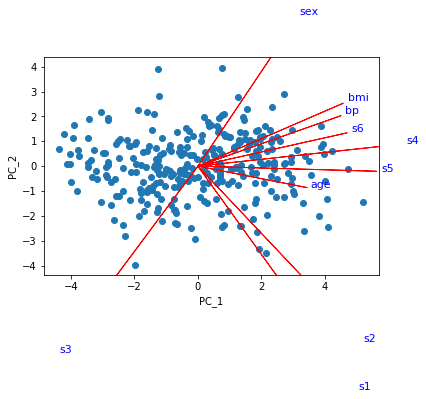

In [13]:
biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)